# Part One: Logistic Regression for Digit Classification

In [1]:
import numpy as np
from numpy.random import default_rng

from sklearn.datasets import make_classification, load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, log_loss, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.set_printoptions(suppress=True, precision=3)


In [2]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('./data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_digits_8_vs_9_noisy/y_test.csv', delimiter=',', skiprows=1)


In [3]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((1983, 784), (1983,), (11800, 784), (11800,))

In [4]:
x_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/my/miniconda3/envs/ml135_env_sp21/lib/pyt

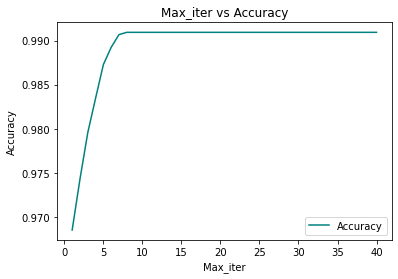

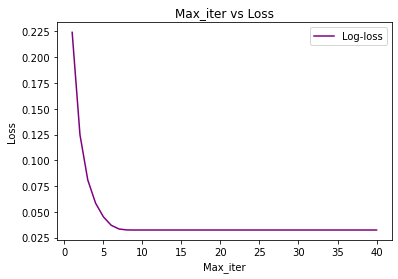

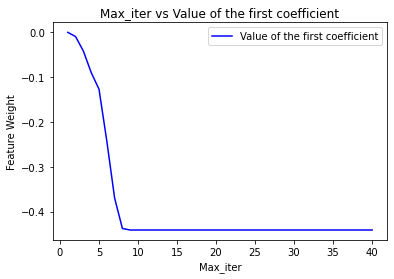

In [10]:
#(1 & 2)

train_accuracy = list()
loss = list()
weights = list()

arr40 = list(range(1, 41))

for i in arr40:    
    model = LogisticRegression(solver='liblinear', max_iter = i)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    
    y_prob = model.predict_proba(x_train)  #test or train?
    loss.append(log_loss(y_train, y_prob))
    
    weights.append(model.coef_[0][0])
    
plt.plot(arr40, train_accuracy, color='teal', label='Accuracy')
plt.title('Max_iter vs Accuracy')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(arr40, loss, color='purple', label='Log-loss')
plt.title('Max_iter vs Loss')
plt.xlabel('Max_iter')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(arr40, weights, color='blue', label='Value of the first coefficient')
plt.title('Max_iter vs Value of the first coefficient')
plt.xlabel('Max_iter')
plt.ylabel('Feature Weight')
plt.legend()
plt.show()


Discussions:
    
(1) In general, we observe that as the maximum number of iterations (max_iter) increases, we the accuracy of our logistic model increases and logistic loss decreases. There is a sharp increase in accuracy and a decrease in log-loss when iterations increase from 0 to 2. After that, it exhibits diminishing returns, where accuracy converges to 0.99 while log-loss converges to 0.035 as iterations increases from 20 to 40. 

This is because max_iter sets the maximum number of iterations taken for the solvers to converge. As the number of iterations are relatively high, increasing maximum iterations might do little in helping the model performance for a given tolerence value (i.e. the difference between loss at present iteration to its previous iteration) because the algorithm could stop because going through all the iterations if the accuracy converges to its maximum and log-loss to its minimum.



#(2) Below the plot, discuss the results you are seeing; what do they show, and why?


The C value that gives the least loss: 0.03162277660168379
The accuracy score of the model with that C value:  0.9672213817448311
[[942  32]
 [ 35 974]]


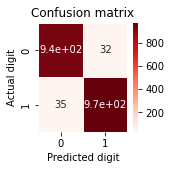

In [60]:
#(3)

accuracy2 = list()
loss2 = list()
c_values = list()

C_grid = np.logspace(-9, 6, 31)
for C in C_grid:                # Build and evaluate model for each value C
    c_values.append(C)
    clf = LogisticRegression(solver='liblinear', C = C)  #default penalty is l2
    clf.fit(x_train, y_train)
    accuracy2.append(clf.score(x_test, y_test))
       
    y_prob = clf.predict_proba(x_test)  
    loss2.append(log_loss(y_test, y_prob))

min_loss_index = loss2.index(min(loss2))
best_c = c_values[min_loss_index]
print('The C value that gives the least loss:', best_c)
print('The accuracy score of the model with that C value: ', accuracy2[min_loss_index])
    

clf = LogisticRegression(C = best_c)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

# The basic CM isn't very pretty, but we can jazz it up with some plotting.
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, cmap='Reds')
plt.ylabel('Actual digit')
plt.xlabel('Predicted digit')
plt.title('Confusion matrix')
plt.show()



----------(5) final weights--------


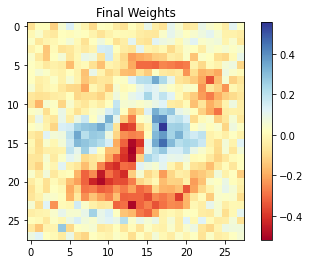

In [67]:
print("----------(5) final weights--------")
weights = clf.coef_
im = plt.imshow(np.reshape(weights, (28, 28)), cmap = "RdYlBu")
plt.title('Final Weights')
plt.colorbar(im)
plt.show()


#(4)
Produce two plots:

one consisting of 9 sample images that are false positives in the test set

one consisting of 9 false negatives. 

You can display the images by converting the pixel data using the matplotlib function imshow(), using the Grey colormap, with vmin=0.0 and vmax=1.0. 
Place each plot into your PDF as a properly captioned figure.


False Positives
False Negatives


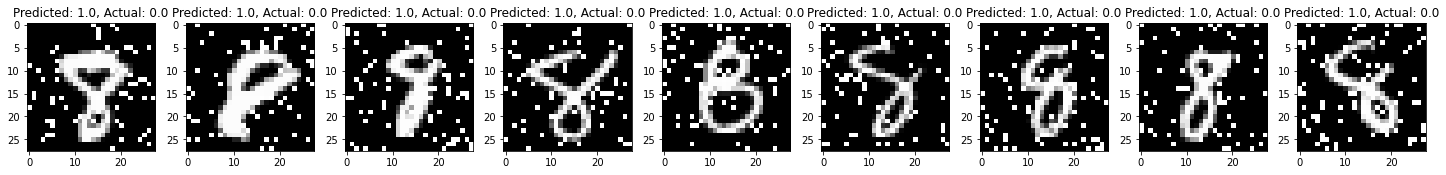

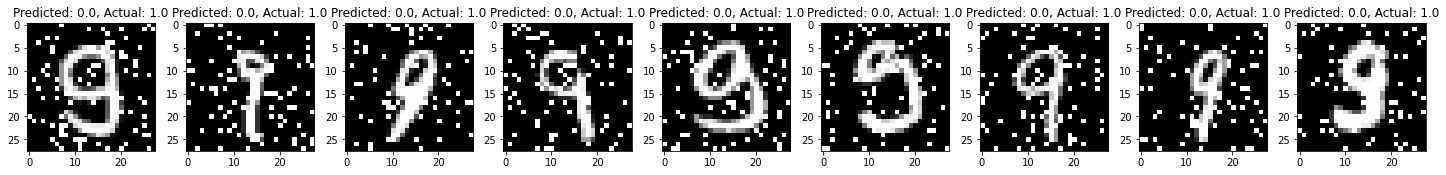

In [57]:
FP = list()
FN = list()

for i in range(len(y_test)):
        if y_test[i] == 1 and predictions[i] == 0: 
            FN.append(i)
        elif y_test[i] == 0 and predictions[i] == 1:
            FP.append(i)
            


print('False Positives')
plt.figure(figsize=(20, 3))
for plotIdx, wrongIdx in enumerate(FP[0:9]):
    plt.subplot(1, 9, plotIdx + 1)
    plt.imshow(np.reshape(x_test[wrongIdx], (28,28)),  cmap = plt.cm.gray, vmin = 0, vmax = 1)
    plt.tight_layout()        #--> no overlapping in figures
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrongIdx],
             y_test[wrongIdx]))

print('False Negatives')
plt.figure(figsize=(20, 3))
for plotIdx, wrongIdx in enumerate(FN[0:9]):
    plt.subplot(1, 9, plotIdx + 1)
    plt.imshow(np.reshape(x_test[wrongIdx], (28,28)), cmap = plt.cm.gray, vmin = 0, vmax = 1)
    plt.tight_layout()
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrongIdx],
             y_test[wrongIdx]))   

 

(5)

Analyze all of the  nal weights produced by your classi er. Reshape the weight
coe cients into a (28   28) matrix, corresponding to the pixels of the original images, and
plot the result using imshow(), with colormap RdYlBu, vmin=-0.5, and vmax=0.5.x Place
this plot into your PDF as a properly captioned  gure. Below it, discuss what it shows.
Which pixels correspond to an 8 (have negative weights), and which correspond to a 9 (have
positive weights)? Why do you think this is the case?

# PART TWO: Trousers v Dresses


In [29]:
# Load the x-data and y-class arrays
x_test = np.loadtxt('./data_trouser_dress/troudress_test_x.csv', delimiter=',', skiprows=1)
x_train = np.loadtxt('./data_trouser_dress/troudress_train_x.csv', delimiter=',', skiprows=1)
y_train = np.loadtxt('./data_trouser_dress/troudress_train_y.csv', delimiter=',', skiprows=1)

In [10]:
x_train.shape, y_train.shape, x_test.shape

((12000, 784), (12000,), (2000, 784))

In [31]:

print("x_train")
print("mean: ", x_train.mean())
print("standard deviation: ",x_train.std())
print("min: ", x_train.min())
print("max: ", x_train.max())  


x_train
mean:  0.31493749522746645
standard deviation:  0.4087038980365875
min:  0.0
max:  1.0


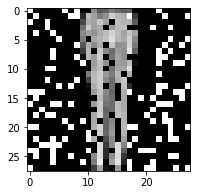

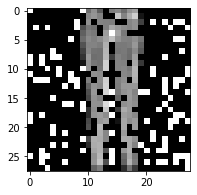

In [34]:
#look at some of the images

plt.figure(figsize=(20, 3))
plt.imshow(np.reshape(x_train[1], (28,28)),  cmap = plt.cm.gray)
plt.figure(figsize=(20, 3))
plt.imshow(np.reshape(x_test[1], (28,28)),  cmap = plt.cm.gray)
plt.show()



In [ ]:
#show a histogram
plt.hist(img.flatten(), bins=[-.5,.5,1.5], ec="k")
plt.xticks((0,1))
plt.show()

In [41]:
umber_of_white_pix = np.sum(img == 255)      # extracting only white pixels 

number_of_black_pix = np.sum(img == 0)          # extracting only black pixels 


NameError: name 'img' is not defined

Do some image noise reduction!

In [ ]:
#implementation of a mean filter

import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

image = cv2.imread('AM04NES.JPG')
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))


plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
#apply minmax normalization to image data, limiting the value range between 0 and 1
# not sure if we need to do this bc our data is from 0 to 1, dividing by 255 will make them too small

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('Number of images in x_train:', x_train.shape[0])

Number of images in x_train 12000


# 0) Baseline classifier: raw pixel features, fed into a Logistic Regression classifier

You should use sklearn.linear_model.LogisticRegression

You should carefully justify all hyperparameters, and select at least one complexity hyperparameter via grid search

In [132]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.predict(x_test)
model.predict_proba(x_test)

y_pred = model.predict(x_train)
y_prob = model.predict_proba(x_train)


print(model.score(x_train, y_train))
print(log_loss(y_train, y_prob))



0.968
0.09632095773616024


/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


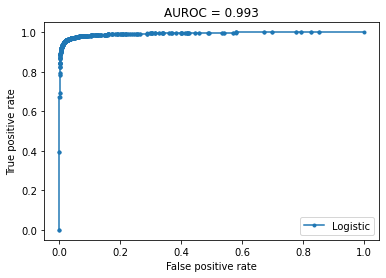

In [133]:
#ROC curve
probs_class1 = y_prob[:,1]
auroc = roc_auc_score(y_train, probs_class1)
fpr, tpr, thresholds = roc_curve(y_train, probs_class1)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.title('AUROC = %.3f' % auroc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend();



In [134]:
for i in range(len(fpr)):
    print("Threshold: %f, TPR: %f, FPR: %f" % (thresholds[i], tpr[i], fpr[i]))


Threshold: 2.000000, TPR: 0.000000, FPR: 0.000000
Threshold: 1.000000, TPR: 0.000167, FPR: 0.000000
Threshold: 0.999811, TPR: 0.395500, FPR: 0.000000
Threshold: 0.999810, TPR: 0.395500, FPR: 0.000167
Threshold: 0.995603, TPR: 0.670167, FPR: 0.000167
Threshold: 0.995602, TPR: 0.670167, FPR: 0.000333
Threshold: 0.993783, TPR: 0.693167, FPR: 0.000333
Threshold: 0.993748, TPR: 0.693167, FPR: 0.000500
Threshold: 0.980474, TPR: 0.784833, FPR: 0.000500
Threshold: 0.980442, TPR: 0.784833, FPR: 0.000667
Threshold: 0.977426, TPR: 0.796333, FPR: 0.000667
Threshold: 0.977371, TPR: 0.796333, FPR: 0.000833
Threshold: 0.965498, TPR: 0.823500, FPR: 0.000833
Threshold: 0.965370, TPR: 0.823500, FPR: 0.001000
Threshold: 0.963659, TPR: 0.826167, FPR: 0.001000
Threshold: 0.963554, TPR: 0.826167, FPR: 0.001167
Threshold: 0.955305, TPR: 0.839333, FPR: 0.001167
Threshold: 0.955243, TPR: 0.839333, FPR: 0.001333
Threshold: 0.952212, TPR: 0.842667, FPR: 0.001333
Threshold: 0.952153, TPR: 0.842667, FPR: 0.001500


In [153]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)


In [154]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape


((8850, 784), (2950, 784), (8850,), (2950,))

In [156]:
#need this???

mean = X_train1.mean()
std = X_train1.std()

X_train1 = (X_train1-mean)/std
X_train1

array([[-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565,  1.991, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       ...,
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565,  1.991],
       [-0.565, -0.565,  1.991, ..., -0.565, -0.565, -0.565]])

In [157]:
lr = LogisticRegression(max_iter=1)
lr.fit(X_train1, y_train1)

/Users/my/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1)

In [159]:
mean = X_test1.mean()
std = X_test1.std()

X_test1=(X_test1-mean)/std
X_test1

array([[-0.565,  1.993, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       ...,
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565],
       [-0.565, -0.565, -0.565, ..., -0.565, -0.565, -0.565]])

In [160]:
lr.score(X_test1,y_test1)


0.923728813559322

# 0) Baseline classifier: raw pixel features, fed into a Logistic Regression classifier

You should use sklearn.linear_model.LogisticRegression

You should carefully justify all hyperparameters, and select at least one complexity hyperparameter via grid search

# 1) A feature transform of your own design, fed into a Logistic Regression classifier

You should write your own transform functions

You should use sklearn.linear_model.LogisticRegression

You should carefully justify all hyperparameters, and select at least one complexity hyperparameter via grid search

# 2) Another feature transform of your own design, fed into a Logistic Regression classifier or some other classifier (e.g. KNeighborsClassifier)

You should write your own transform functions, or use sklearn.preprocessing

You should carefully justify all hyperparameters, and select at least one complexity hyperparameter via grid search

If you choose sklearn.neighbors.KNeighborsClassifier, think carefully about the distance function you use

You can use any classifier in sklearn, but you must understand it and be able to talk about it professionally in your report

# PART THREE: Prediction

In [ ]:
yproba1_test = model.predict_proba(x_test)[:, 1]
np.savetxt(yproba1_test.txt, yproba1_test)